### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Loading Dataset

In [2]:
cancer = load_breast_cancer()

breast_cancer = pd.DataFrame(cancer.data, columns=cancer.feature_names)

breast_cancer['target'] = pd.Series(cancer.target)
breast_cancer['target_names'] = pd.Series(cancer.target_names)

In [3]:
# breast_cancer.to_csv("Breast.csv")

### Data Analysis

In [4]:
breast_cancer.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_names
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,benign
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0,NaN
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0,NaN
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0,NaN


In [5]:
breast_cancer.shape

(569, 32)

In [6]:
breast_cancer.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [7]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
breast_cancer.isnull().sum()

mean radius                  0
mean texture                 0
mean perimeter               0
mean area                    0
mean smoothness              0
mean compactness             0
mean concavity               0
mean concave points          0
mean symmetry                0
mean fractal dimension       0
radius error                 0
texture error                0
perimeter error              0
area error                   0
smoothness error             0
compactness error            0
concavity error              0
concave points error         0
symmetry error               0
fractal dimension error      0
worst radius                 0
worst texture                0
worst perimeter              0
worst area                   0
worst smoothness             0
worst compactness            0
worst concavity              0
worst concave points         0
worst symmetry               0
worst fractal dimension      0
target                       0
target_names               567
dtype: i

In [9]:
breast_cancer['target_names'].value_counts()

benign       1
malignant    1
Name: target_names, dtype: int64

In [11]:
breast_cancer['target_names'] = breast_cancer['target'].replace({0: 'malignant', 1: 'benign'})

In [12]:
breast_cancer['target_names'].value_counts()

benign       357
malignant    212
Name: target_names, dtype: int64

In [13]:
breast_cancer['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

In [14]:
Malingnant = breast_cancer[breast_cancer['target'] == 0]
Benign = breast_cancer[breast_cancer['target'] == 1]
print(Benign.shape)
print(Malingnant.shape)

(357, 32)
(212, 32)


In [15]:
breast_cancer.corr()['mean radius'][breast_cancer.corr()['mean radius'] > 0.5]

mean radius             1.000000
mean perimeter          0.997855
mean area               0.987357
mean compactness        0.506124
mean concavity          0.676764
mean concave points     0.822529
radius error            0.679090
perimeter error         0.674172
area error              0.735864
worst radius            0.969539
worst perimeter         0.965137
worst area              0.941082
worst concavity         0.526911
worst concave points    0.744214
Name: mean radius, dtype: float64

In [16]:
breast_cancer.corr(method='spearman')['mean radius'][breast_cancer.corr(method='spearman')['mean radius'] > 0.5]

mean radius             1.000000
mean perimeter          0.997802
mean area               0.999602
mean concavity          0.645728
mean concave points     0.759702
radius error            0.550247
perimeter error         0.565520
area error              0.738077
worst radius            0.978604
worst perimeter         0.971555
worst area              0.978863
worst concavity         0.596043
worst concave points    0.727265
Name: mean radius, dtype: float64

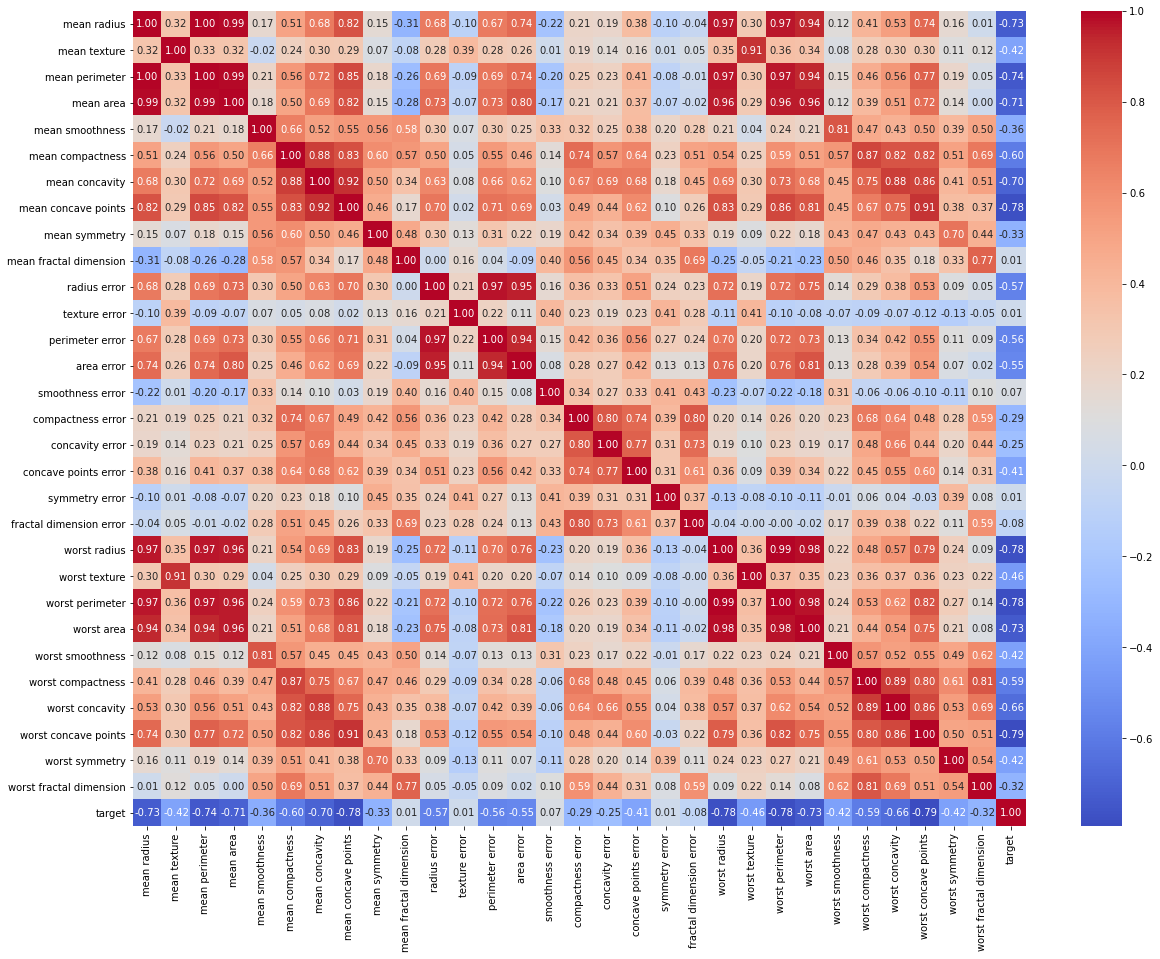

In [17]:
plt.figure(figsize=(20,15))
sns.heatmap(breast_cancer.corr(), cmap='coolwarm', annot=True, fmt='.2f')
plt.show()

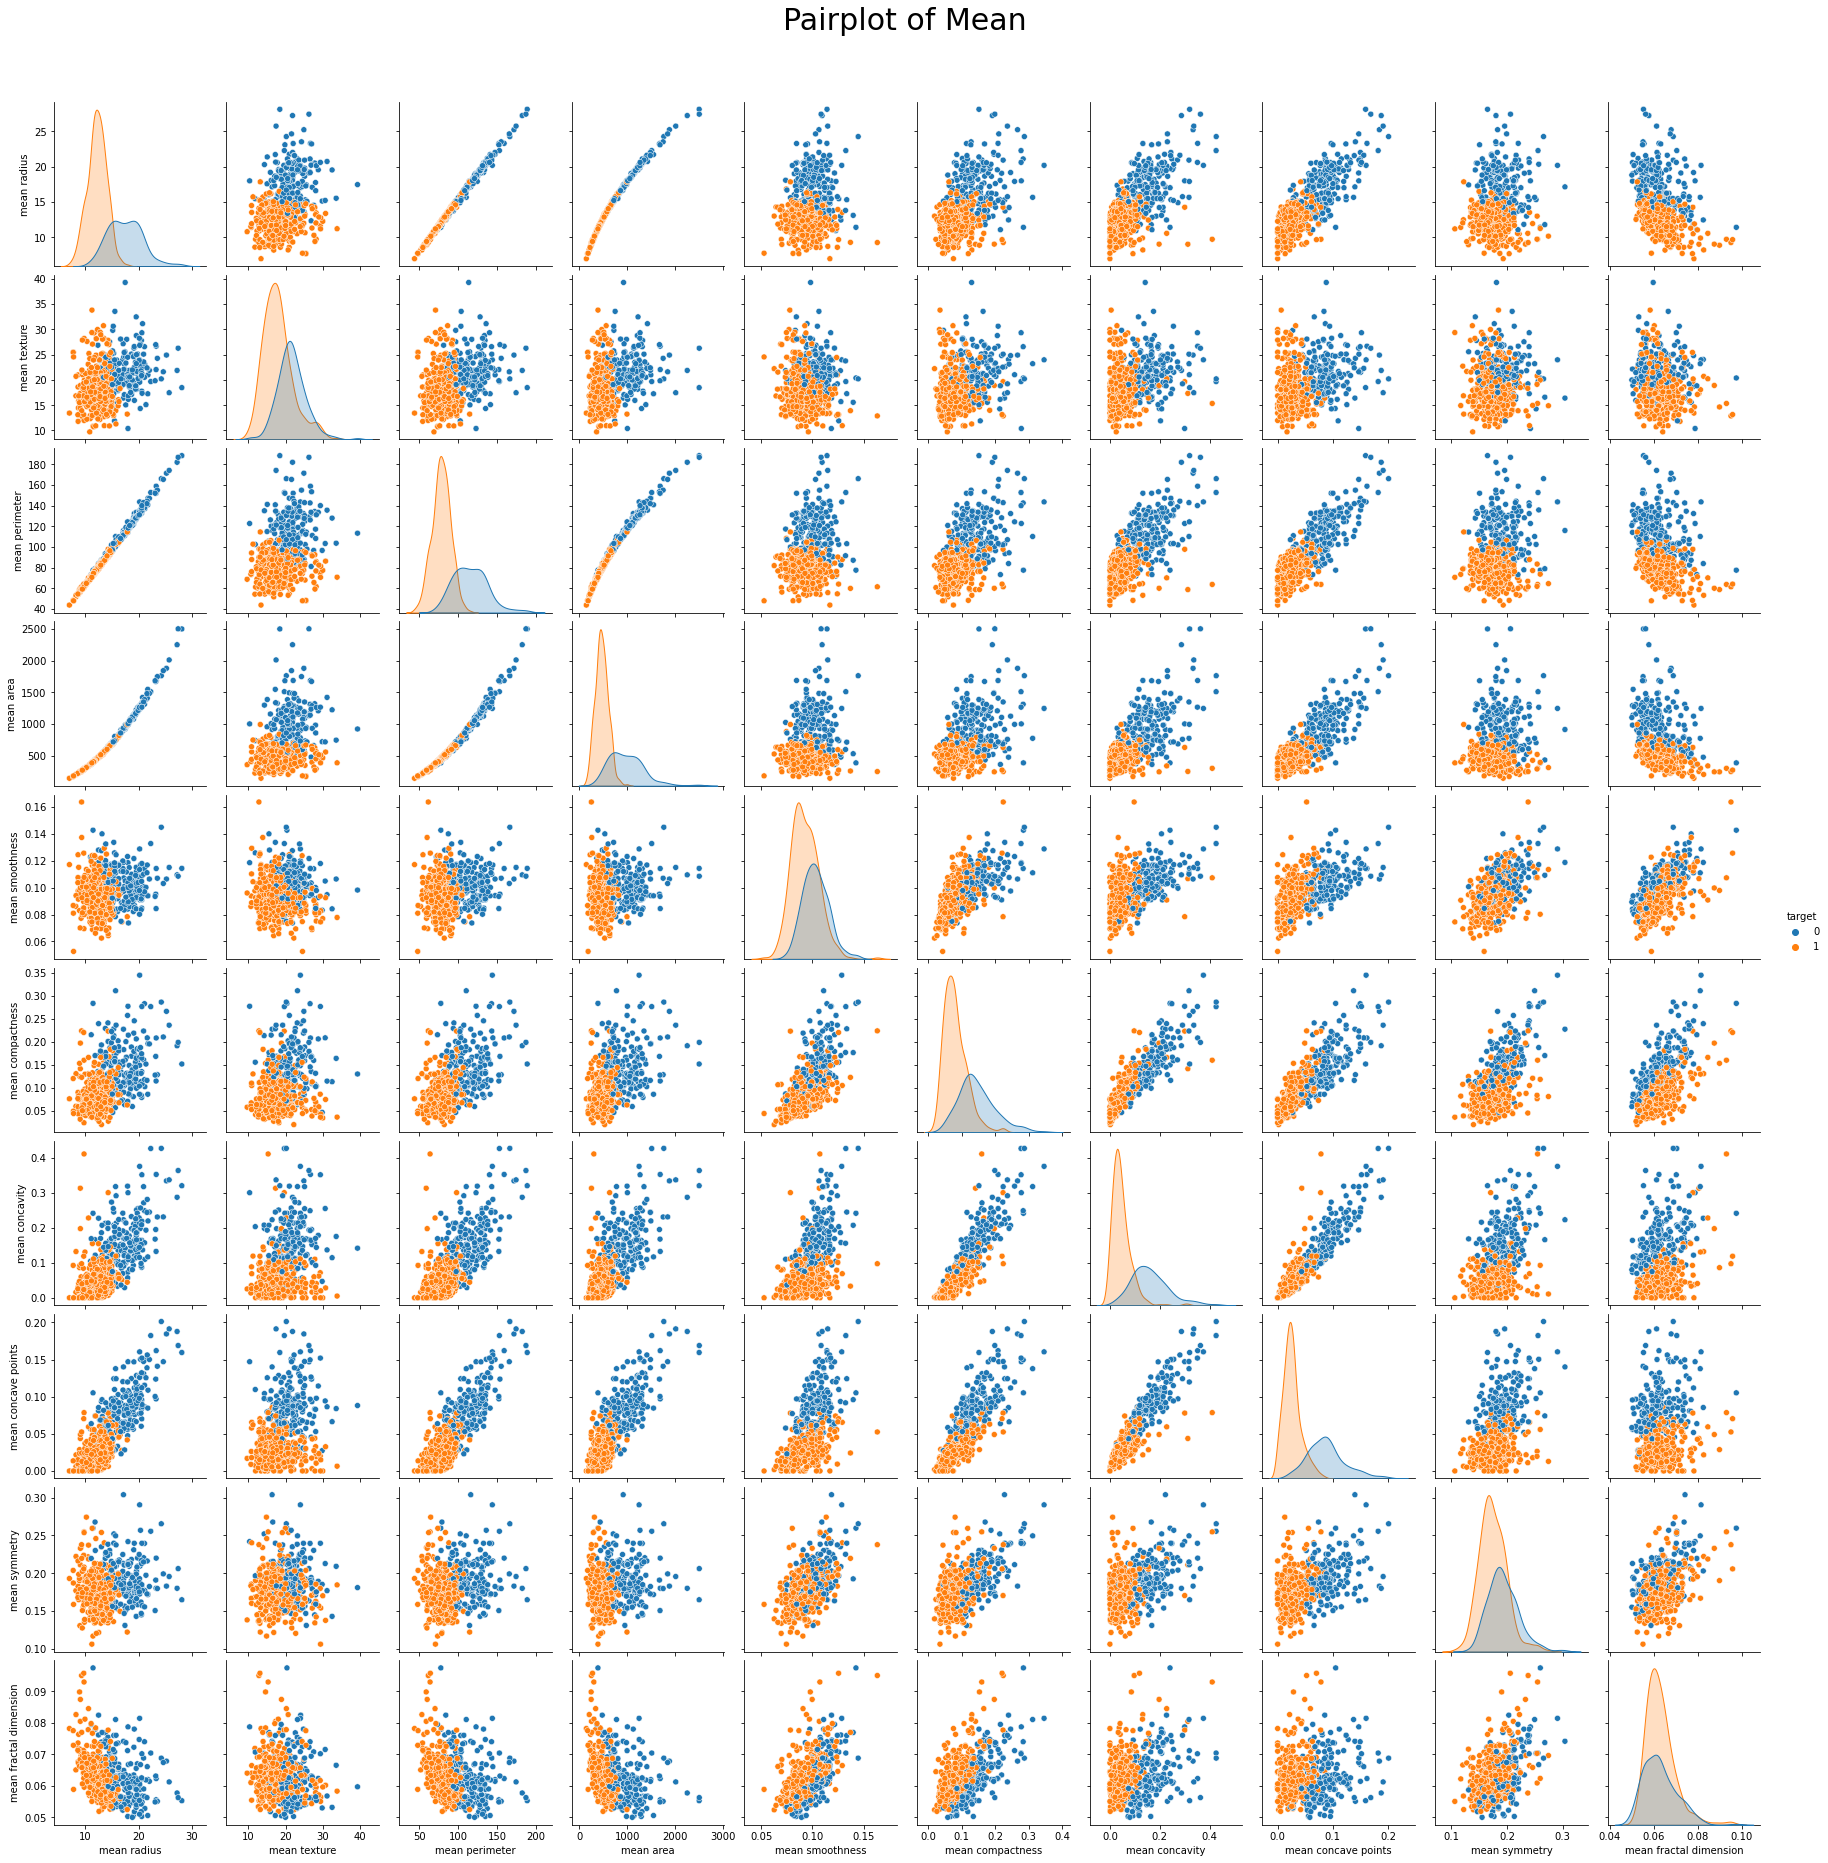

In [18]:
sns.pairplot(breast_cancer, hue='target', vars=list(breast_cancer.columns[0:10]))
plt.suptitle('Pairplot of Mean', y=1.04, size=30)
plt.show()

In [19]:
breast_cancer1 = breast_cancer.drop(['target_names'], axis=1)
breast_cancer1.rename(columns = lambda x: x.replace(' ', '_'), inplace=True)
X = breast_cancer1.drop(['target'], axis=1)
Y = breast_cancer1["target"].copy() 

In [20]:
breast_cancer1.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [21]:
X.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,mean_compactness,mean_concavity,mean_concave_points,mean_symmetry,mean_fractal_dimension,...,worst_radius,worst_texture,worst_perimeter,worst_area,worst_smoothness,worst_compactness,worst_concavity,worst_concave_points,worst_symmetry,worst_fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Splitting Data into Training & Test Part

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(455, 30) (455,)
(114, 30) (114,)


### Training Model

In [24]:
xgb = XGBClassifier(random_state=42)

xgb.fit(X_train, Y_train)

Y_pred2 = xgb.predict(X_test)

print('Training Accuracy:', xgb.score(X_train, Y_train))
print('Test Accuracy:', accuracy_score(Y_test, Y_pred2))

C:\Users\JUGAL\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:29:52] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy: 1.0
Test Accuracy: 0.956140350877193


In [25]:
print('Classification Report\n\n', classification_report(Y_test, Y_pred2))

Classification Report

               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



<AxesSubplot:>

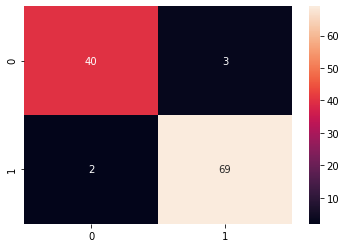

In [26]:
cm2 = confusion_matrix(Y_test, Y_pred2)
sns.heatmap(cm2, annot=True, fmt="d")

### Saving Model

In [27]:
# Saving Model & Loading It to Check Usage

import pickle

file = open('./Models/Breast_model_pkl', 'wb')
pickle.dump(xgb, file)
file.close()
file = open('./Models/Breast_model_pkl', 'rb')
model = pickle.load(file)
file.close()

input_data = (17.99,10.38,122.8,1001.0,0.1184,0.2776,0.3001,0.1471,0.2419,0.07871,1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189)

np_array = np.asarray(input_data)
data_reshaped = np_array.reshape(1,-1)

prediction = model.predict(data_reshaped)

if (prediction[0] == 0):
    print("{} - Not having Breast Cancer".format(prediction[0]))
else:
        print("{} - Having Breast Cancer".format(prediction[0]))

0 - Not having Breast Cancer
